In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Практика 2
Корешков

## Задача 1.1
Знайти одним з ітераційних методів дійсні корені рівнянь з точністю
ε (наприклад ε=10−4).

$$f(x) = x^3-5x^2+4x+0.092 = 0$$

In [9]:
# Визначення функції
def f(x):
    return x**3 - 5*x**2 + 4*x + 0.092

# визначення бажаної похибки значення
eps = 1e-4

## Приблизний аналіз
Будуємо приблизний графік. Дивимося на знак значення функції.

Оскільки у нас поліном, для поліномів є свої методи аналітичного пошуку кількості коренів та їх приблизного розташування. В тому числі:
- пошук верхньої та нижньої межі додатних та від'ємних дійсних коренів
- метод Штурма для визначення кількості та кратності коренів та наявності комплексних

В резльтаті аналізу (можливо реалізувати програмно, але тут опущу цей етап) матимемо розбиття області визначення, кожна область якого має один корінь. 

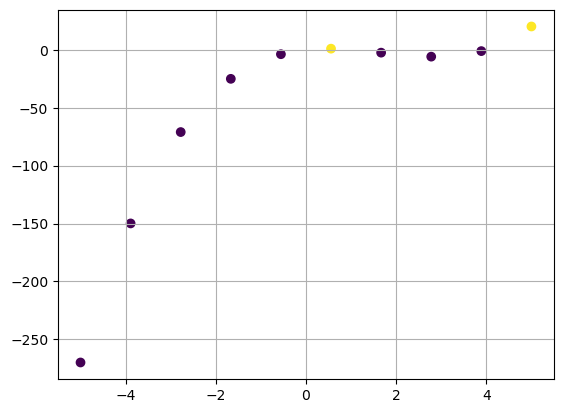

In [12]:
X = np.linspace(-5,5,10)
Y = f(X)
plt.scatter(X,Y, c=(Y>0))
plt.grid()

Вручну задам розбиття. Зауважу, що поліном 3 степеня може мати не більше 3 дійсних коренів

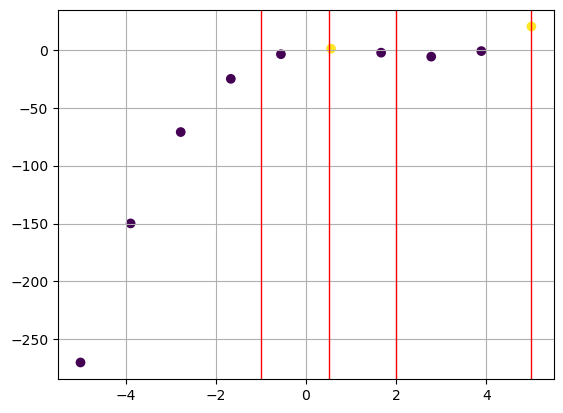

In [21]:
a1 = -1
a2 = 0.5
a3 = 2
a4 = 5
plt.scatter(X,Y, c=(Y>0))
plt.grid()
for a in [a1,a2,a3,a4]:
    plt.axvline(a, c='r', lw=1)


Далі треба застосувати один з ітеративних методів уточнення коренів для кожного інтервалу що має корінь

## Метод 1. Бісекції

In [34]:
# Шукає корінь `f` з точністю аргументу до `eps` у інтервалі `(a;b)` 
def bisect(f,a,b,eps):
    fa = f(a)
    fb = f(b)
    N = 0

    sa = fa>0
    sb = fb>0
    
    dx = np.abs(a-b)
    
    while (dx > eps):
        print(f"n{N:2}: ({a:.5f} ; {b:.5f}), |a-b| = {dx:.5f} > eps")
        print(f">  f(a) = {fa:.5f}")
        print(f">  f(b) = {fb:.5f}")

        if (not sa^sb):
            print("f(a) and f(b) has the same sign. Aborting.")
            return
        
        c = (a+b)/2
        fc = f(c)
        sc = fc>0
        
        print(f">  c={c:.5f}")
        print(f">  f(c) = {fc:.5f}")

        if not sa^sc:
            # f(a), f(c) has the same sign. Root is in (c; b)
            a = c
            fa = fc
            print(f">  f(a)f(c)>0 => a <- c")
        elif not sb^sc:
            # f(c), f(b) has the same sign. root is in (a; c)
            b = c
            fb = fc
            print(f">  f(c)f(b)>0 => b <- c")
        else:
            print("something very wrong happened, aborting.")

        dx = np.abs(a-b)
        N = N+1
        
    print()
    print(f"|a-b| = {dx:.5f} < eps = {eps:.5f}. Stopping after {N} iterations")

    x = (a+b)/2
    fx = f(x)
    print(f"Finished. f(x*) = {fx:.5f} for x* = {x:.5f}")


In [35]:
bisect(f, a1, a2, 1e-4)

n 0: (-1.00000 ; 0.50000), |a-b| = 1.50000 > eps
>  f(a) = -9.90800
>  f(b) = 0.96700
>  c=-0.25000
>  f(c) = -1.23612
>  f(a)f(c)>0 => a <- c
n 1: (-0.25000 ; 0.50000), |a-b| = 0.75000 > eps
>  f(a) = -1.23612
>  f(b) = 0.96700
>  c=0.12500
>  f(c) = 0.51583
>  f(c)f(b)>0 => b <- c
n 2: (-0.25000 ; 0.12500), |a-b| = 0.37500 > eps
>  f(a) = -1.23612
>  f(b) = 0.51583
>  c=-0.06250
>  f(c) = -0.17778
>  f(a)f(c)>0 => a <- c
n 3: (-0.06250 ; 0.12500), |a-b| = 0.18750 > eps
>  f(a) = -0.17778
>  f(b) = 0.51583
>  c=0.03125
>  f(c) = 0.21215
>  f(c)f(b)>0 => b <- c
n 4: (-0.06250 ; 0.03125), |a-b| = 0.09375 > eps
>  f(a) = -0.17778
>  f(b) = 0.21215
>  c=-0.01562
>  f(c) = 0.02828
>  f(c)f(b)>0 => b <- c
n 5: (-0.06250 ; -0.01562), |a-b| = 0.04688 > eps
>  f(a) = -0.17778
>  f(b) = 0.02828
>  c=-0.03906
>  f(c) = -0.07194
>  f(a)f(c)>0 => a <- c
n 6: (-0.03906 ; -0.01562), |a-b| = 0.02344 > eps
>  f(a) = -0.07194
>  f(b) = 0.02828
>  c=-0.02734
>  f(c) = -0.02113
>  f(a)f(c)>0 => a <- c
n 

In [50]:
f(-0.0224)

-0.00012003942400000411

In [39]:
# Теоретична оцінка кількості ітерацій
print(f"Теоретична оцінка кількості ітерацій: ", np.log2((a2-a1)/eps))

Теоретична оцінка кількості ітерацій:  13.872674880270605


Перший корінь 
$$x_1 = -0.0224$$

Теоретично передбачено що вистачить 14 ітерацій. Фактично вийшло 14 ітерацій, що радує

## Метод 2. Ньютона

Другий корінь знайду іншим методом

In [42]:
def newton(f,df,x0,eps):
    prev_x = x0
    x = np.inf
    dx = np.inf
    N = 0
    while np.abs(dx) > eps:
        fx = f(prev_x)
        dfx = df(prev_x)
        dx = fx/dfx
        x = prev_x - dx
        prev_x = x
        print(f"n {N:2}: new x = {x:.5f}")
        print(f">  f(prev_x) = {fx:.5f}")
        print(f">  f'(prev_x) = {dfx:.5f}")
        print(f">  step = f(prev_x)/f'(prev_x) = {dx:.5f}")
        N += 1
    print()
    print(f"Finished in {N} iterations because step = {dx:.5f} < eps = {eps:.5f}")
    print(f"f(x*) = {f(x):.5f} for x* = {x:.5f}")



Також знайдемо похідну

$$f(x) = x^3-5x^2+4x+0.092 = 0$$
$$f'(x) = 3x^2 - 10x + 4$$

In [51]:
def df(x):
    return 3*x**2 -10*x+4

# Зауважу що у якості початкового наближення x* я взяв центр інтервалу, 
#   в якому очікую знайти корінь

newton(f, df, (a3-a2)/2, 1e-4)

n  0: new x = 1.13697
>  f(prev_x) = 0.70137
>  f'(prev_x) = -1.81250
>  step = f(prev_x)/f'(prev_x) = -0.38697
n  1: new x = 1.03562
>  f(prev_x) = -0.35385
>  f'(prev_x) = -3.49158
>  step = f(prev_x)/f'(prev_x) = 0.10134
n  2: new x = 1.03009
>  f(prev_x) = -0.01736
>  f'(prev_x) = -3.13868
>  step = f(prev_x)/f'(prev_x) = 0.00553
n  3: new x = 1.03007
>  f(prev_x) = -0.00006
>  f'(prev_x) = -3.11765
>  step = f(prev_x)/f'(prev_x) = 0.00002

Finished in 4 iterations because step = 0.00002 < eps = 0.00010
f(x*) = -0.00000 for x* = 1.03007


In [49]:
f(1.0301)

-8.474909899955363e-05

In [48]:
# Теоретична оцінка кількості ітерацій

m = np.abs(2*(f(a3)-f(a2))/(a3-a2)) # чисельна оцінка m_1
M = 6*a3 - 10 # чисельна оцінка M_2
q = M*np.abs(a3-a2)/(2*m)
print(f"m = {m};   M = {M};   q = {q}")

ntheor = np.log2( np.log((a3-a2)/(2*eps)) / (-np.log(q)) ) + 2
print(f"Теоретична оцінка кількості ітерацій: ", ntheor)

m = 6.5;   M = 2;   q = 0.23076923076923078
Теоретична оцінка кількості ітерацій:  4.605256816017363


Другий корінь 
$$x_2 = 1.0301$$

Теоретично передбачено що вистачить 5 ітерацій. Фактично вийшло 4 ітерацій, що радує

---

Третій корінь шукатиму аналогічно

In [52]:
newton(f, df, (a4-a3)/2, 1e-4)

n  0: new x = 1.08047
>  f(prev_x) = -1.78300
>  f'(prev_x) = -4.25000
>  step = f(prev_x)/f'(prev_x) = 0.41953
n  1: new x = 1.03146
>  f(prev_x) = -0.16184
>  f'(prev_x) = -3.30246
>  step = f(prev_x)/f'(prev_x) = 0.04901
n  2: new x = 1.03007
>  f(prev_x) = -0.00434
>  f'(prev_x) = -3.12289
>  step = f(prev_x)/f'(prev_x) = 0.00139
n  3: new x = 1.03007
>  f(prev_x) = -0.00000
>  f'(prev_x) = -3.11758
>  step = f(prev_x)/f'(prev_x) = 0.00000

Finished in 4 iterations because step = 0.00000 < eps = 0.00010
f(x*) = -0.00000 for x* = 1.03007


In [53]:
(a4-a3)/2

1.5

Бачимо що алгоритм знайшов другий корінь замість третього.

In [55]:
newton(f, df, a4, 1e-4)

n  0: new x = 4.30717
>  f(prev_x) = 20.09200
>  f'(prev_x) = 29.00000
>  step = f(prev_x)/f'(prev_x) = 0.69283
n  1: new x = 4.03778
>  f(prev_x) = 4.46754
>  f'(prev_x) = 16.58348
>  step = f(prev_x)/f'(prev_x) = 0.26940
n  2: new x = 3.99347
>  f(prev_x) = 0.55535
>  f'(prev_x) = 12.53314
>  step = f(prev_x)/f'(prev_x) = 0.04431
n  3: new x = 3.99230
>  f(prev_x) = 0.01388
>  f'(prev_x) = 11.90864
>  step = f(prev_x)/f'(prev_x) = 0.00117
n  4: new x = 3.99230
>  f(prev_x) = 0.00001
>  f'(prev_x) = 11.89237
>  step = f(prev_x)/f'(prev_x) = 0.00000

Finished in 5 iterations because step = 0.00000 < eps = 0.00010
f(x*) = 0.00000 for x* = 3.99230


Тепер ок, інший корінь

In [56]:
f(3.9923)

1.4573467006867569e-05

Спробуємо на цьому самому інтервалі методом дихотомії

In [57]:
bisect(f, a3, a4, 1e-4)

n 0: (2.00000 ; 5.00000), |a-b| = 3.00000 > eps
>  f(a) = -3.90800
>  f(b) = 20.09200
>  c=3.50000
>  f(c) = -4.28300
>  f(a)f(c)>0 => a <- c
n 1: (3.50000 ; 5.00000), |a-b| = 1.50000 > eps
>  f(a) = -4.28300
>  f(b) = 20.09200
>  c=4.25000
>  f(c) = 3.54513
>  f(c)f(b)>0 => b <- c
n 2: (3.50000 ; 4.25000), |a-b| = 0.75000 > eps
>  f(a) = -4.28300
>  f(b) = 3.54513
>  c=3.87500
>  f(c) = -1.30058
>  f(a)f(c)>0 => a <- c
n 3: (3.87500 ; 4.25000), |a-b| = 0.37500 > eps
>  f(a) = -1.30058
>  f(b) = 3.54513
>  c=4.06250
>  f(c) = 0.86959
>  f(c)f(b)>0 => b <- c
n 4: (3.87500 ; 4.06250), |a-b| = 0.18750 > eps
>  f(a) = -1.30058
>  f(b) = 0.86959
>  c=3.96875
>  f(c) = -0.27619
>  f(a)f(c)>0 => a <- c
n 5: (3.96875 ; 4.06250), |a-b| = 0.09375 > eps
>  f(a) = -0.27619
>  f(b) = 0.86959
>  c=4.01562
>  f(c) = 0.28121
>  f(c)f(b)>0 => b <- c
n 6: (3.96875 ; 4.01562), |a-b| = 0.04688 > eps
>  f(a) = -0.27619
>  f(b) = 0.28121
>  c=3.99219
>  f(c) = -0.00132
>  f(a)f(c)>0 => a <- c
n 7: (3.99219 

Очікувано, він знаходить потрібний корінь